<a href="https://colab.research.google.com/github/Clay190/Data-Science/blob/master/FinalProjectColab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Thomas Clay Kynor

## Final Project - **Data Analysis**

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Need this import for setting font size in pie chart
import matplotlib as mpl
import seaborn as sns

df=pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vSoxxWIaHJQiYn89u9QhRK7CGYGzvGMXrfIaDGvi2jinp3TmorfFzrsnR0uV2xNpuHdL7F8rFKVOUMi/pub?output=csv")

In [0]:
df

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,NaN,"2,156,624,900",796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,NaN,"2,156,624,900",796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,NaN,"2,156,624,900",796,Generation X


Before we mess with the dataset, I wanted to look at how many suicides there are in a country in relation to the population. To do this, all we have to do is add another column called 'suicideRate' which calculates the ratio of people that commit suicide in that country/year.

In [0]:
df['suicideRate'] = (df.suicides_no/df.population)

Once we load the dataset, our first steps are to understand what we are actually looking at. To do that, we have to find out what our columns are and what they tell us, we can do this by using the .header() command.

In [0]:
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year', 'gdp_for_year ($)',
       'gdp_per_capita ($)', 'generation', 'suicideRate'],
      dtype='object')

We can also learn more about the data set by using the .describe() command.

*This way of displaying data, although it doesn't look visually appealing whatsoever, can be very informative as it calculates the mean, max, min and other percentiles for each of our data columns.*

In [0]:
df.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($),suicideRate
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414,0.000128
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472,0.000190
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000,0.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000,0.000009
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000,0.000060
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000,0.000166
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000,0.002250


Now that we know a basis of the sort of information that we can get from this dataset, we can start to visually demonstrate this data so we can understand what we are looking at.

*Note: These graphs should be somewhat basic as they are just for a greater understanding of the dataset, once we get to understand the correlations between certain columns in the set, we can use more intricate graphs to display the data in different ways.* 

The first correlation we want to delve into is between suicides and years. We want to see how many collective suicides (collective total from all countries) there are in each year. To do this, we have to find a way to add up all of the suicides from each country that year into a collective number per year. To do this, we have to make a new variable called sumPerYear and we can group our suicides_no (which shows suicides in each country that year) and group those by year, to create a total.


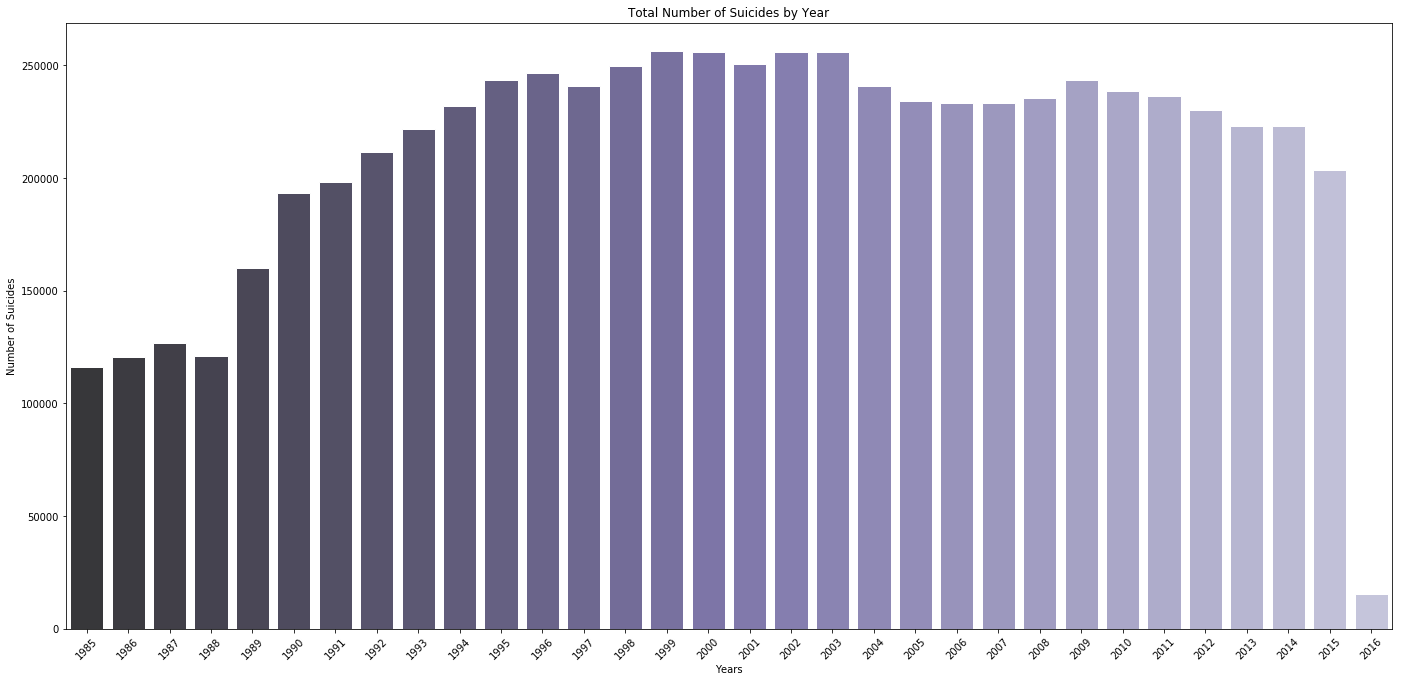

In [0]:
sumPerYear = pd.DataFrame(df['suicides_no'].groupby(df['year']).sum())
sumPerYear = sumPerYear.reset_index().sort_values(by='suicides_no',ascending=False)
most_cont_yr = sumPerYear
# Reduced figure size
fig = plt.figure(figsize=(20,10))
plt.title('Total Number of Suicides by Year')
sns.set(font_scale=2)
sns.barplot(y='suicides_no',x='year',data=most_cont_yr,palette="Purples_d");
plt.xlabel('Years')
plt.xticks(rotation=45)
plt.ylabel('Number of Suicides')
plt.tight_layout()

The next thing we can look at is the number of suicides in each country for the past years. To do this, we have to add the amount of suicides for each year up together to find how many people in the past 31 years have committed suicide in these countries. We do this the with the excat same grouping method as used in the previous example.

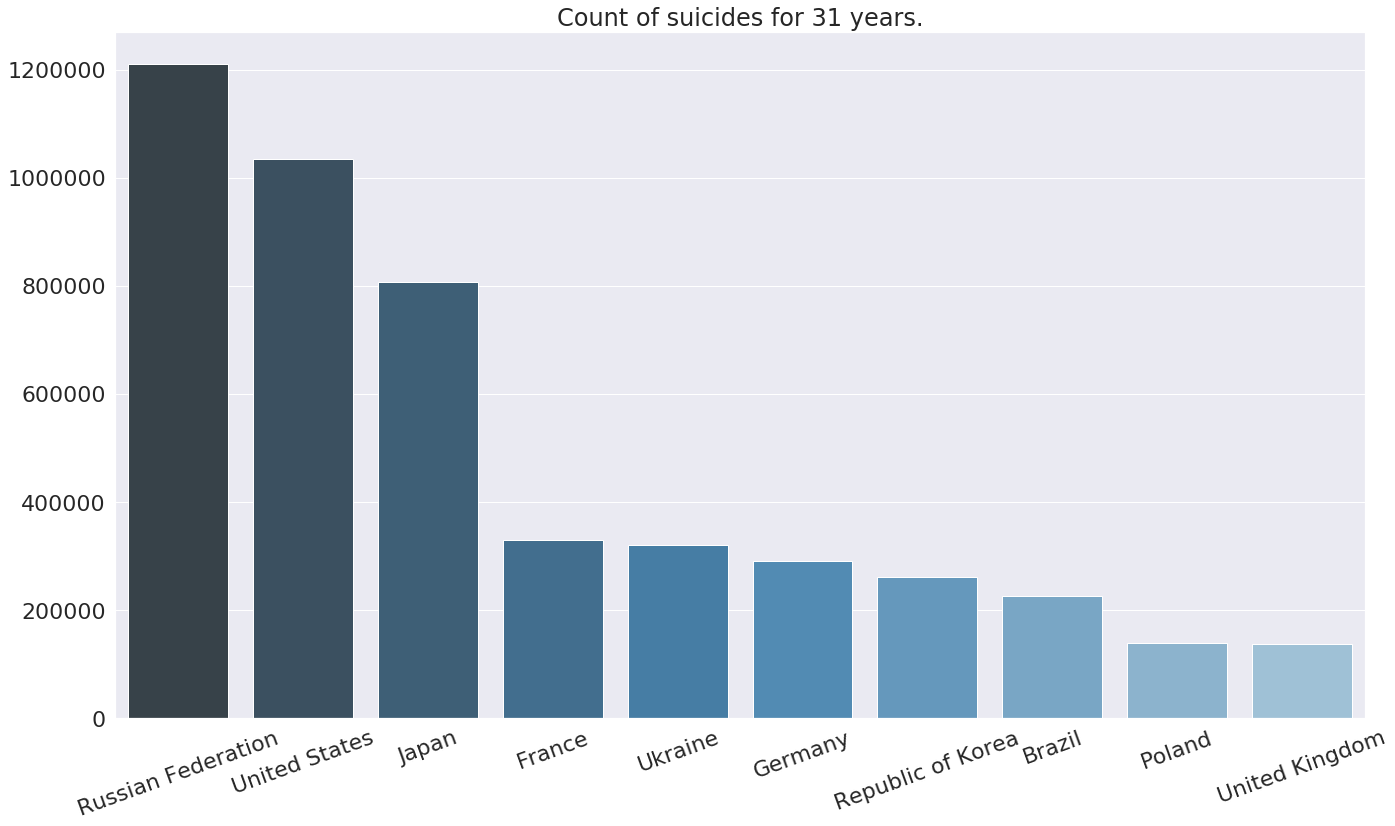

In [0]:
sumPerYear = pd.DataFrame(df['suicides_no'].groupby(df['country']).sum())
sumPerYear = sumPerYear.reset_index().sort_values(by='suicides_no',ascending=False)
most_cont = sumPerYear.head(10)
# Reduced figure width
fig = plt.figure(figsize=(20,12))
plt.title('Count of suicides for 31 years.')
sns.set(font_scale=2)
sns.barplot(y='suicides_no',x='country',data=most_cont,palette="Blues_d")
plt.xticks(rotation=20)
plt.ylabel('');
plt.xlabel('')
plt.tight_layout()

As we can see, the Russian Federation has the highest suicide numbers at over 1,200,000 suicides in the past 31 years. For the past two graphs so far, we have used a bar plots. Two advantages of using a bar plot is that it is somewhat easy to set up and you don't necessarily have to worry about input types so it is a relatively easy graph to use. Another benefiet of using a barplot while graphing is that you can easily see the correlation between different things, like in the first example you could see how the suicide totals changed over the years, and easily visualize the trends.

Another type of barplot we will try is to make a horizontal barplot of all countries in the past years and their suicide rates in relation to their population. This will give us a more accurate representation of the suicides in each country as our previous graphs doesn't consider population. Theoretically, the more people you have, the more amount of people in your country that are going to commit suicide. That might explain the why the United States and Russian Federation's suicide numbers are so overwhelming. 

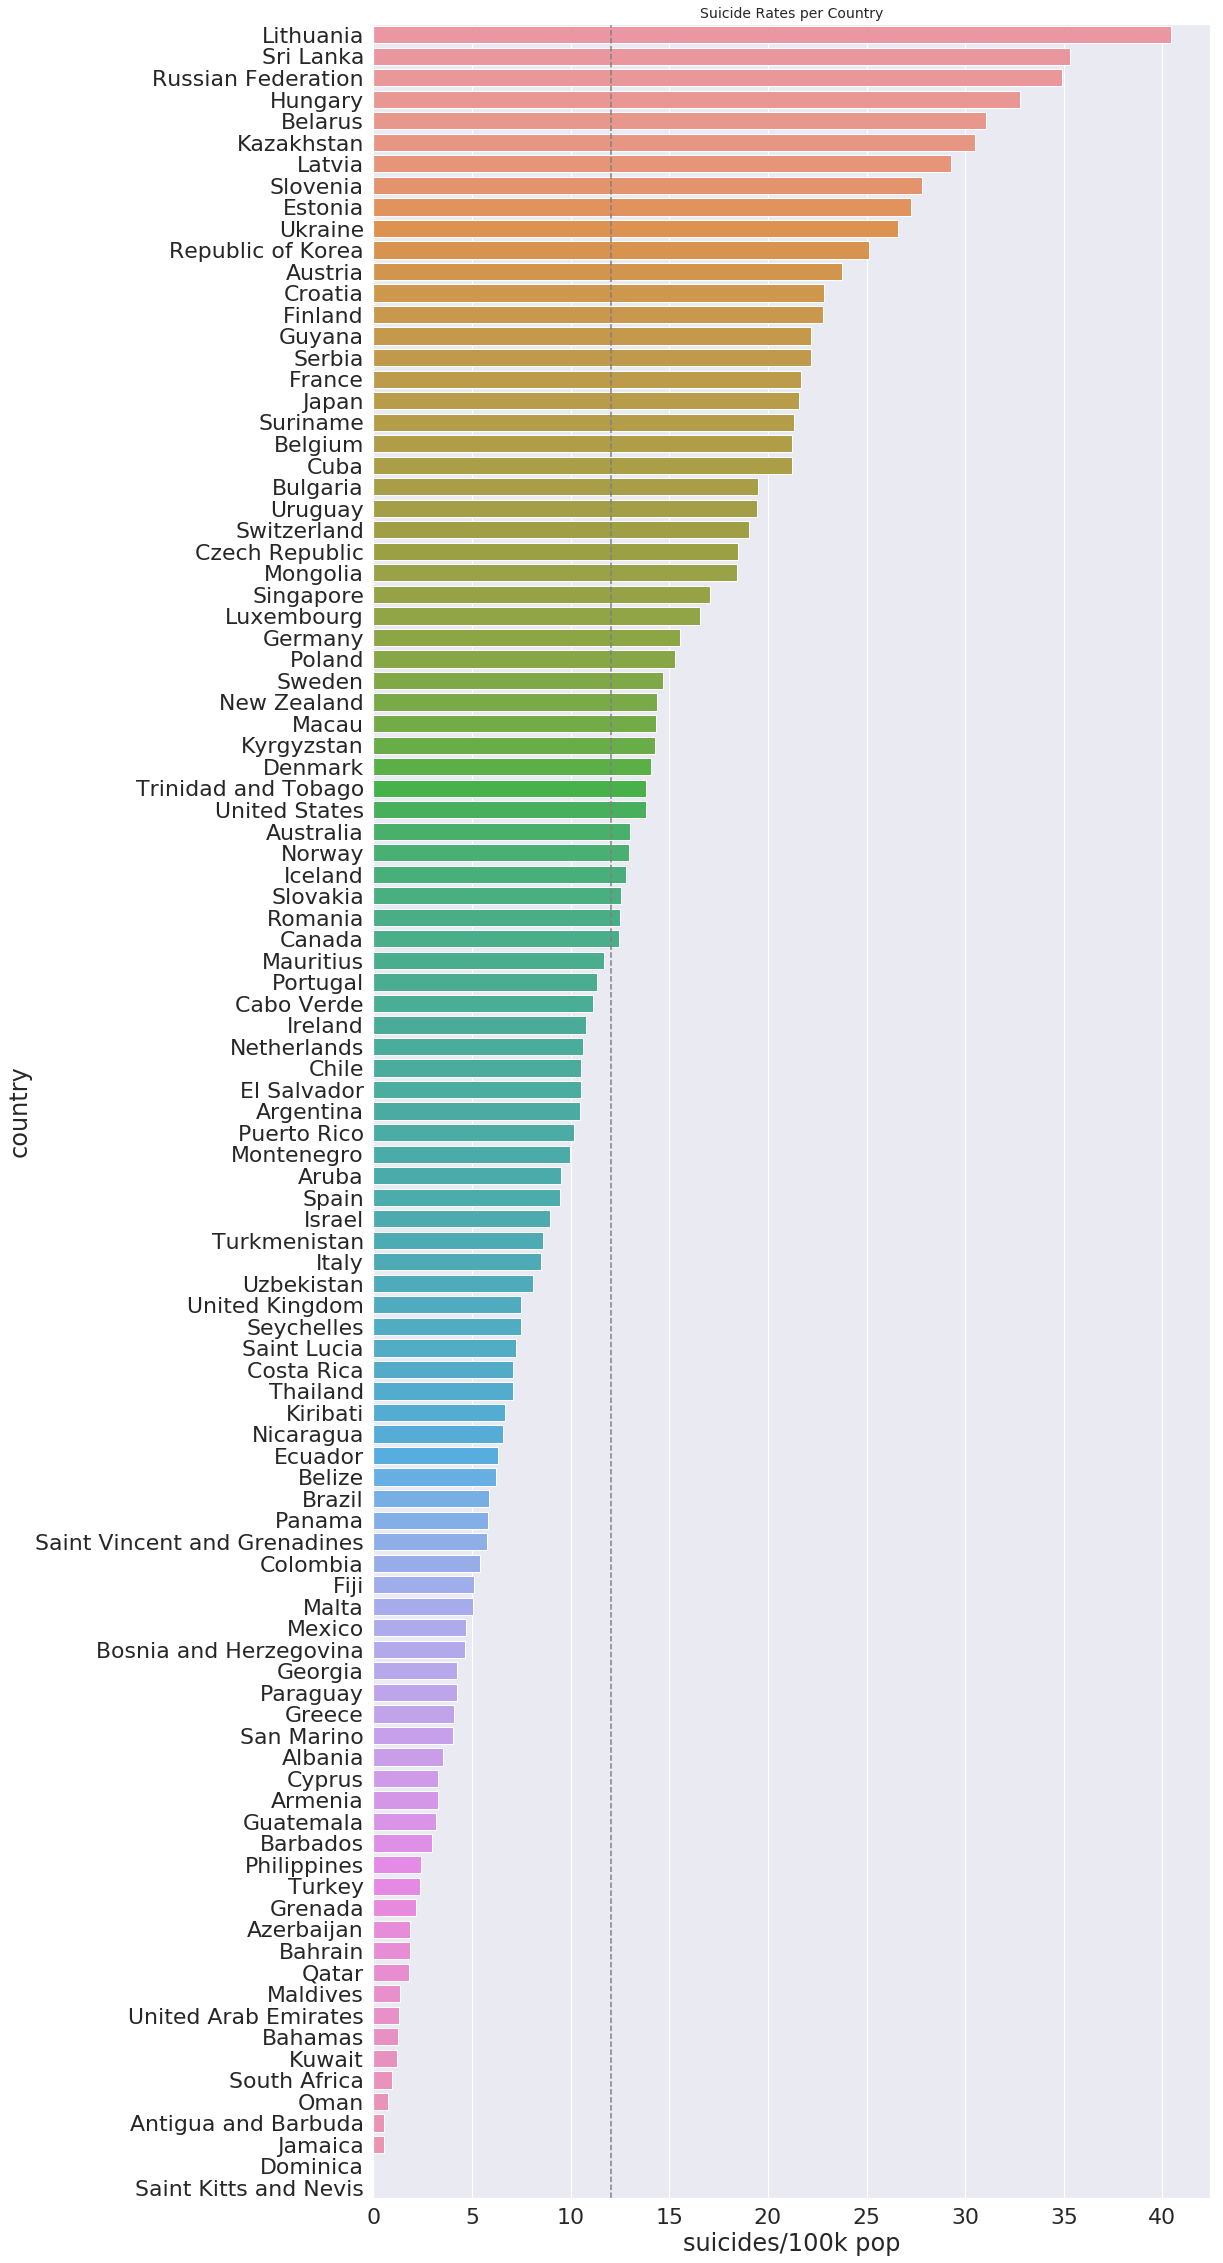

In [0]:
suicideRate = df['suicides/100k pop'].groupby(df['country']).mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(15,40))
plt.title('Suicide Rates per Country', fontsize=14)
plt.axvline(x=suicideRate['suicides/100k pop'].mean(),color='gray',ls='--')
sns.barplot(data=suicideRate, y='country',x='suicides/100k pop')

Look at how low the United States is with this graph compared to Lithuania!

Another interesting thing we can do to dig further into this data set and learn about barplots more, is that we can make a similar barplot, yet this time, we can show the top countries for suicides in the past 31 years, and seperate our data even more to show suicide rates by gender in these countries. We can also change the color palatte of the graph using seaborn (sns).

Suprisingly, this data set shows that in these top countries, the number of male suicides far outweigh female suicides. Another interesting thing that we can see in this dataset is that Japan, despite having the third highes male suicide rate, has the highest female suicide rate.

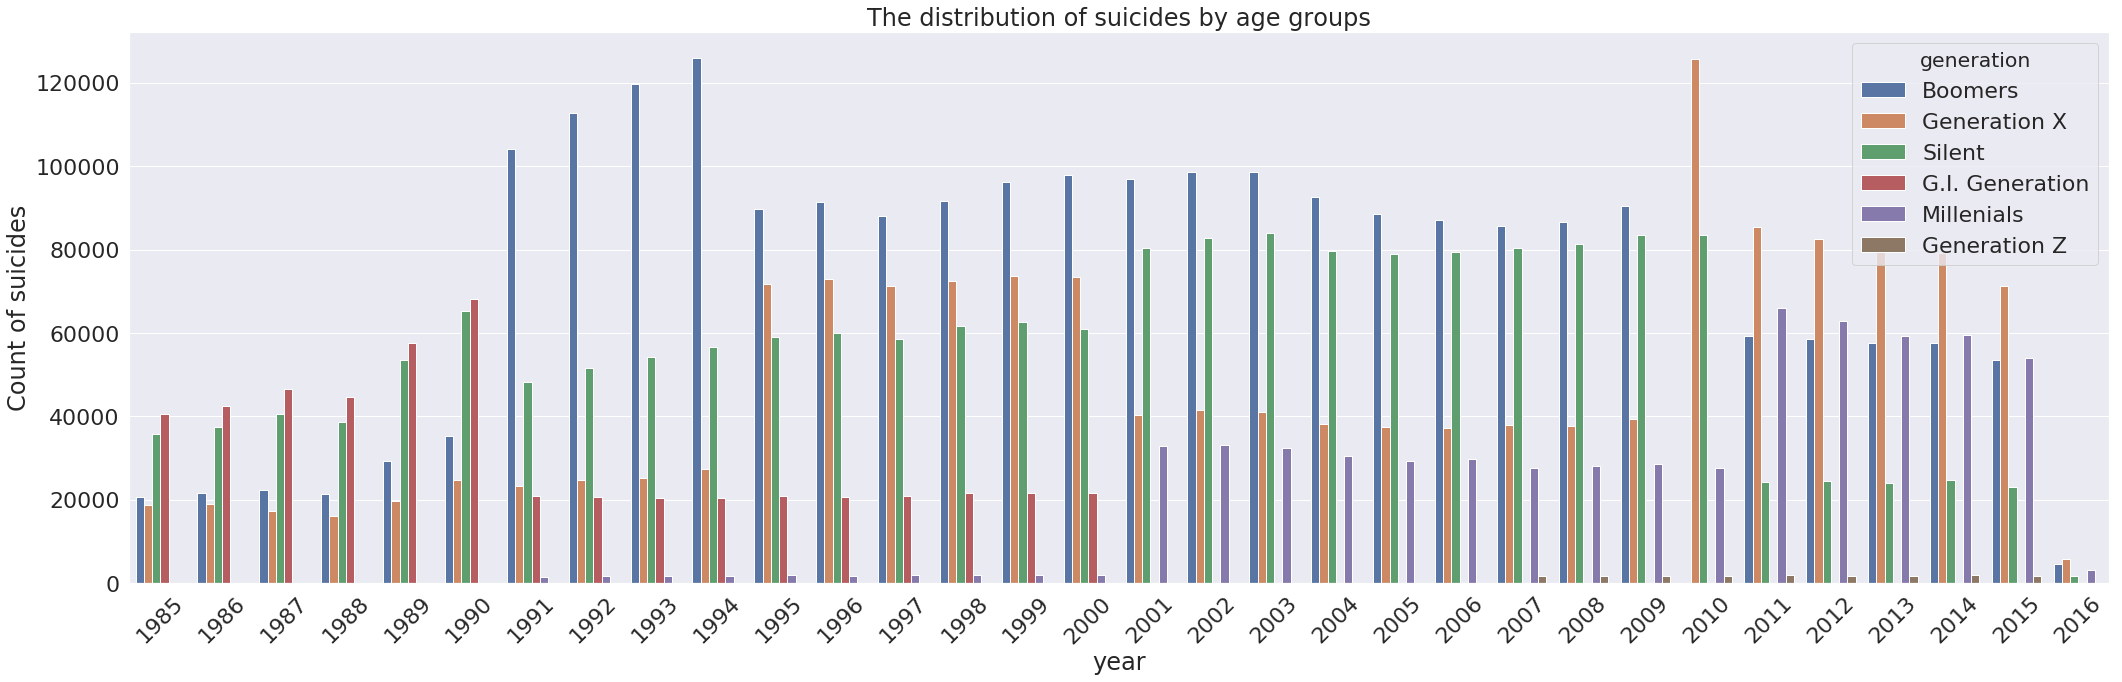

In [0]:
suic_sum_yr = pd.DataFrame(df['suicides_no'].groupby([df['generation'],df['year']]).sum())
suic_sum_yr = suic_sum_yr.reset_index().sort_values(by='suicides_no',ascending=False)
most_cont_yr = suic_sum_yr
fig = plt.figure(figsize=(30,10))
plt.title('The distribution of suicides by age groups')

sns.set(font_scale=2)
sns.barplot(y='suicides_no',x='year',hue='generation',data=most_cont_yr,palette='deep');
plt.ylabel('Count of suicides')
plt.xticks(rotation=45)
plt.tight_layout()

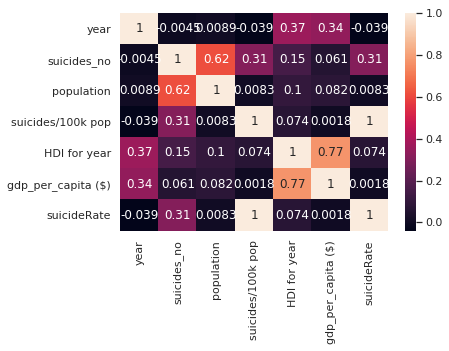

In [0]:
# The font size for this keeps getting screwed up so just using defaults
#_ = sns.heatmap(df.corr(), annot=True)
# Changed font size
sns.set(font_scale=1)
sns.heatmap(df.corr(), annot=True)

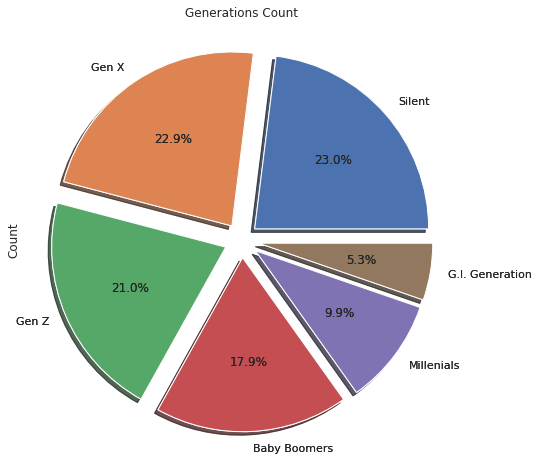

In [0]:
values = df['generation']

# Got rid of second plot axis, font size still questionable
ax=plt.gca()
labels = ['Silent','Gen X', 'Gen Z', 'Baby Boomers', 'Millenials', 'G.I. Generation']
df['generation'].value_counts().plot.pie(explode=[0.1,0.1,0.1,0.1,0.1,0.1], labels = labels, autopct='%1.1f%%',shadow=True)
#plot = df['generation'].value_counts().plot.pie(explode=[0.1,0.1,0.1,0.1,0.1,0.1], labels = labels, autopct='%1.1f%%',ax=ax[0],shadow=True)
plot = df['generation'].value_counts().plot.pie(explode=[0.1,0.1,0.1,0.1,0.1,0.1], labels = labels, autopct='%1.1f%%',shadow=True, figsize = (8,8))

# Increase font size (had to import this earlier)
mpl.rcParams['font.size'] = 9.0
ax.set_title('Generations Count')
ax.set_ylabel('Count')
plt.show()

Now we can use an add-on called altair to use interactive graphs.

In [0]:
# Plots are created using the altair library
# Only plotting first 1500 rows of the data - maybe best to select a few countries....
dfShort = df.head(1500)
import altair as alt
alt.Chart(dfShort, width = 600, height = 200).mark_tick().encode(
  x = 'suicides/100k pop',
  y = 'generation',
  color = 'generation',
  tooltip = ['country', 'year', 'sex']
).interactive()

Chart({
  data:         country  year  ... gdp_per_capita ($)       generation
  0       Albania  1987  ...                796     Generation X
  1       Albania  1987  ...                796           Silent
  2       Albania  1987  ...                796     Generation X
  3       Albania  1987  ...                796  G.I. Generation
  4       Albania  1987  ...                796          Boomers
  5       Albania  1987  ...                796  G.I. Generation
  6       Albania  1987  ...                796           Silent
  7       Albania  1987  ...                796          Boomers
  8       Albania  1987  ...                796  G.I. Generation
  9       Albania  1987  ...                796     Generation X
  10      Albania  1987  ...                796  G.I. Generation
  11      Albania  1987  ...                796     Generation X
  12      Albania  1988  ...                769  G.I. Generation
  13      Albania  1988  ...                769     Generation X
  14      Albania  1988  ...                769  G.I. Generation
  15      Albania  1988  ...                769           Silent
  16      Albania  1988  ...                769  G.I. Generation
  17      Albania  1988  ...                769     Generation X
  18      Albania  1988  ...                769  G.I. Generation
  19      Albania  1988  ...                769          Boomers
  20      Albania  1988  ...                769          Boomers
  21      Albania  1988  ...                769           Silent
  22      Albania  1988  ...                769     Generation X
  23      Albania  1988  ...                769     Generation X
  24      Albania  1989  ...                833  G.I. Generation
  25      Albania  1989  ...                833          Boomers
  26      Albania  1989  ...                833           Silent
  27      Albania  1989  ...                833  G.I. Generation
  28      Albania  1989  ...                833     Generation X
  29      Albania  1989  ...                833           Silent
  ...         ...   ...  ...                ...              ...
  1470  Australia  1988  ...              15393  G.I. Generation
  1471  Australia  1988  ...              15393     Generation X
  1472  Australia  1988  ...              15393     Generation X
  1473  Australia  1988  ...              15393     Generation X
  1474  Australia  1989  ...              19223  G.I. Generation
  1475  Australia  1989  ...              19223          Boomers
  1476  Australia  1989  ...              19223     Generation X
  1477  Australia  1989  ...              19223  G.I. Generation
  1478  Australia  1989  ...              19223           Silent
  1479  Australia  1989  ...              19223  G.I. Generation
  1480  Australia  1989  ...              19223  G.I. Generation
  1481  Australia  1989  ...              19223          Boomers
  1482  Australia  1989  ...              19223           Silent
  1483  Australia  1989  ...              19223     Generation X
  1484  Australia  1989  ...              19223     Generation X
  1485  Australia  1989  ...              19223     Generation X
  1486  Australia  1990  ...              19665  G.I. Generation
  1487  Australia  1990  ...              19665          Boomers
  1488  Australia  1990  ...              19665     Generation X
  1489  Australia  1990  ...              19665  G.I. Generation
  1490  Australia  1990  ...              19665           Silent
  1491  Australia  1990  ...              19665  G.I. Generation
  1492  Australia  1990  ...              19665          Boomers
  1493  Australia  1990  ...              19665  G.I. Generation
  1494  Australia  1990  ...              19665           Silent
  1495  Australia  1990  ...              19665     Generation X
  1496  Australia  1990  ...              19665     Generation X
  1497  Australia  1990  ...              19665     Generation X
  1498  Australia  1991  ...              20320  G.I. Generation
  1499  Australia  19

In [0]:
alt.Chart(dfShort, width = 600, height = 200).mark_tick().encode(
  x = 'suicides/100k pop',
  y = 'generation',
  color = 'sex',
  tooltip = ['country', 'year']
).interactive()

Chart({
  data:         country  year  ... gdp_per_capita ($)       generation
  0       Albania  1987  ...                796     Generation X
  1       Albania  1987  ...                796           Silent
  2       Albania  1987  ...                796     Generation X
  3       Albania  1987  ...                796  G.I. Generation
  4       Albania  1987  ...                796          Boomers
  5       Albania  1987  ...                796  G.I. Generation
  6       Albania  1987  ...                796           Silent
  7       Albania  1987  ...                796          Boomers
  8       Albania  1987  ...                796  G.I. Generation
  9       Albania  1987  ...                796     Generation X
  10      Albania  1987  ...                796  G.I. Generation
  11      Albania  1987  ...                796     Generation X
  12      Albania  1988  ...                769  G.I. Generation
  13      Albania  1988  ...                769     Generation X
  14      Albania  1988  ...                769  G.I. Generation
  15      Albania  1988  ...                769           Silent
  16      Albania  1988  ...                769  G.I. Generation
  17      Albania  1988  ...                769     Generation X
  18      Albania  1988  ...                769  G.I. Generation
  19      Albania  1988  ...                769          Boomers
  20      Albania  1988  ...                769          Boomers
  21      Albania  1988  ...                769           Silent
  22      Albania  1988  ...                769     Generation X
  23      Albania  1988  ...                769     Generation X
  24      Albania  1989  ...                833  G.I. Generation
  25      Albania  1989  ...                833          Boomers
  26      Albania  1989  ...                833           Silent
  27      Albania  1989  ...                833  G.I. Generation
  28      Albania  1989  ...                833     Generation X
  29      Albania  1989  ...                833           Silent
  ...         ...   ...  ...                ...              ...
  1470  Australia  1988  ...              15393  G.I. Generation
  1471  Australia  1988  ...              15393     Generation X
  1472  Australia  1988  ...              15393     Generation X
  1473  Australia  1988  ...              15393     Generation X
  1474  Australia  1989  ...              19223  G.I. Generation
  1475  Australia  1989  ...              19223          Boomers
  1476  Australia  1989  ...              19223     Generation X
  1477  Australia  1989  ...              19223  G.I. Generation
  1478  Australia  1989  ...              19223           Silent
  1479  Australia  1989  ...              19223  G.I. Generation
  1480  Australia  1989  ...              19223  G.I. Generation
  1481  Australia  1989  ...              19223          Boomers
  1482  Australia  1989  ...              19223           Silent
  1483  Australia  1989  ...              19223     Generation X
  1484  Australia  1989  ...              19223     Generation X
  1485  Australia  1989  ...              19223     Generation X
  1486  Australia  1990  ...              19665  G.I. Generation
  1487  Australia  1990  ...              19665          Boomers
  1488  Australia  1990  ...              19665     Generation X
  1489  Australia  1990  ...              19665  G.I. Generation
  1490  Australia  1990  ...              19665           Silent
  1491  Australia  1990  ...              19665  G.I. Generation
  1492  Australia  1990  ...              19665          Boomers
  1493  Australia  1990  ...              19665  G.I. Generation
  1494  Australia  1990  ...              19665           Silent
  1495  Australia  1990  ...              19665     Generation X
  1496  Australia  1990  ...              19665     Generation X
  1497  Australia  1990  ...              19665     Generation X
  1498  Australia  1991  ...              20320  G.I. Generation
  1499  Australia  19

In [0]:
# We have to pull out a few countries or there is too much data to make a reasonable plot
countryList = ['United States', 'Lithuania', 'Germany', 'Turkey', 'Canada', 'Mexico']
fewCountries = df.loc[(df['country'].isin(countryList))]
alt.Chart(fewCountries, width = 500, height = 500).mark_circle().encode(
  x = 'suicides/100k pop',
  y = 'gdp_per_capita ($)',
  color = 'country',
  tooltip = ['sex', 'year']
).interactive()

Chart({
  data:              country  year  ... gdp_per_capita ($)       generation
  4916          Canada  1985  ...              15522  G.I. Generation
  4917          Canada  1985  ...              15522  G.I. Generation
  4918          Canada  1985  ...              15522          Boomers
  4919          Canada  1985  ...              15522           Silent
  4920          Canada  1985  ...              15522     Generation X
  4921          Canada  1985  ...              15522           Silent
  4922          Canada  1985  ...              15522  G.I. Generation
  4923          Canada  1985  ...              15522          Boomers
  4924          Canada  1985  ...              15522  G.I. Generation
  4925          Canada  1985  ...              15522     Generation X
  4926          Canada  1985  ...              15522     Generation X
  4927          Canada  1985  ...              15522     Generation X
  4928          Canada  1986  ...              16062  G.I. Generation
  4929          Canada  1986  ...              16062          Boomers
  4930          Canada  1986  ...              16062           Silent
  4931          Canada  1986  ...              16062  G.I. Generation
  4932          Canada  1986  ...              16062     Generation X
  4933          Canada  1986  ...              16062           Silent
  4934          Canada  1986  ...              16062  G.I. Generation
  4935          Canada  1986  ...              16062          Boomers
  4936          Canada  1986  ...              16062  G.I. Generation
  4937          Canada  1986  ...              16062     Generation X
  4938          Canada  1986  ...              16062     Generation X
  4939          Canada  1986  ...              16062     Generation X
  4940          Canada  1987  ...              18124          Boomers
  4941          Canada  1987  ...              18124  G.I. Generation
  4942          Canada  1987  ...              18124  G.I. Generation
  4943          Canada  1987  ...              18124           Silent
  4944          Canada  1987  ...              18124     Generation X
  4945          Canada  1987  ...              18124           Silent
  ...              ...   ...  ...                ...              ...
  27190  United States  2013  ...              56520          Boomers
  27191  United States  2013  ...              56520       Millenials
  27192  United States  2013  ...              56520       Millenials
  27193  United States  2013  ...              56520           Silent
  27194  United States  2013  ...              56520     Generation Z
  27195  United States  2013  ...              56520     Generation Z
  27196  United States  2014  ...              58531           Silent
  27197  United States  2014  ...              58531          Boomers
  27198  United States  2014  ...              58531     Generation X
  27199  United States  2014  ...              58531       Millenials
  27200  United States  2014  ...              58531       Millenials
  27201  United States  2014  ...              58531     Generation X
  27202  United States  2014  ...              58531          Boomers
  27203  United States  2014  ...              58531       Millenials
  27204  United States  2014  ...              58531       Millenials
  27205  United States  2014  ...              58531           Silent
  27206  United States  2014  ...              58531     Generation Z
  27207  United States  2014  ...              58531     Generation Z
  27208  United States  2015  ...              60387           Silent
  27209  United States  2015  ...              60387          Boomers
  27210  United States  2015  ...              60387     Generation X
  27211  United States  2015  ...              60387       Millenials
  27212  United States  2015  ...              60387       Millenials
  27213  United States  2015  ...              60387     Generation X
  27214  United States  2015  ...              60387          Boom

**Thomas Clay Kynor**

**Computer Programming Final Write Up - Analysis of Data Science Majors in Colleges**

   The study of data science is incredibly new, as five years ago there was no such thing as a data science major in any colleges in the US (3). However, nowadays there are  603 colleges allow students to study in this field (1). positions such as Junior Data Analyst or Junior Data Scientist.  System-specific training or certifications in data-related fields (e.g., business intelligence applications, relational database management systems, data visualization software, etc.) might help when looking for entry-level data science jobs (2). A major typically requires between 10 and 16 data science courses for degree completion, while a minor normally only requires 4 to 6. As for job opportunities when leaving college and entering the workforce, data scientists right out of college can expect to earn an outstanding `$`95,000 (4).

With enough experience and knowledge in the workplace, experienced data scientists can earn anywhere from `$`250,000 and up (4). However despite the monetary aspect of the job, due to the recent influx of people studying to be data scientists, as the number of undergraduate degrees in statistics has tripled in the past decade (4), this is one of the most demanding occupations as you have to master many different languages and put in incredibly long hours. As I was researching for this project, I came in contact with one of my brother's friends at Lehigh University. Despite this college not being ivy league, yet still a decent school with around a 30% acceptance rate, he was hired by Google right out of undergrad and is now making around `$`120,000  a year with promises of his salary going up after a couple years on the job. Now this is an absurd amount of money for anyone to be making with their first job with only an undergraduate degree; however, he has to work 60+ hour work weeks and he tells me that the job is incredibly strenuous.

I was interested in the monetary aspect of this (because who doesn't like money) so I took this run-down of this from the University of Wisconnsin

**Data scientist:**
*Those with the job title of “data scientist” are generally experienced, expert-level professionals in data-driven organizations*

Salary range: `$85,000-170,000`

**Data analyst**
*Data analysts work hands-on with data and tend to be at a point in their careers when they are focused on building up data science tools and skill sets.*

Entry-level salary: `$50,000-$75,000`

Experienced salary: `$65,000-$110,000`

**Data science/analytics manager**
*These professionals have one to three direct reports, sharp technical and quantitative skills, and strong leadership and business aptitude.*

Salary range: 90,000-140,000

**Big data engineer**
*Engineers can solve problems and drive business value by building the platforms and applications that data scientists use to perform data analytics.*

Junior/generalist salary: `$70,000-$115,000`

Domain expert salary: `$100,000-$165,000`


In [0]:
from google.colab import files
from IPython.display import Image
uploaded = files.upload()

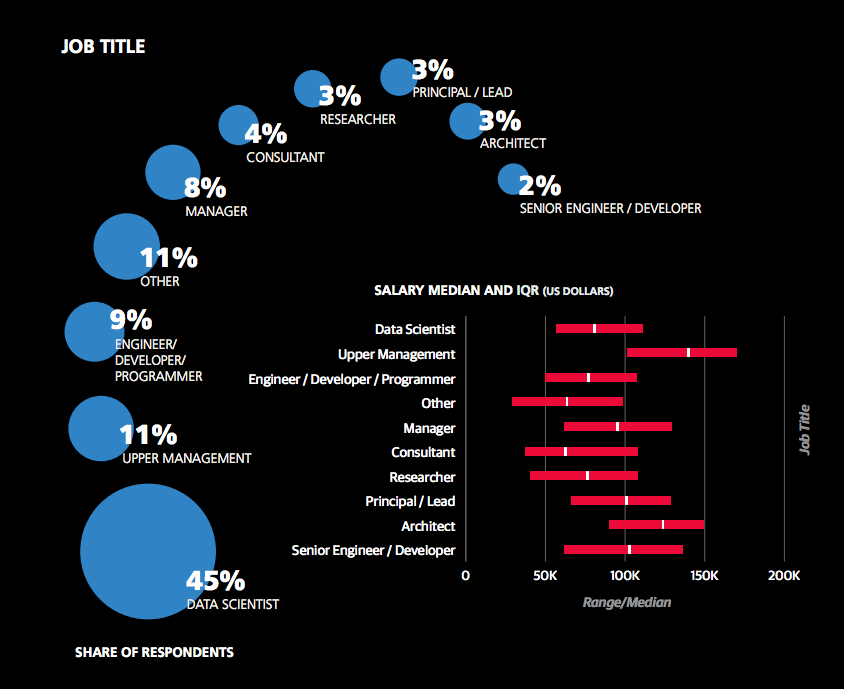

In [0]:
Image('Job Title Figure.png')

Looking at some of this data, I was suprised by the amount my friend was getting paid at Google, as it didn't seem to corraborate with some of the numbers that the University of Wisconnsin was putting out. After doing some further digging, I discovered that these huge companies pay way more for data scientists (as would be expected) than other startups. I was interested in this, so I looked further and found this:

Median Salaries of Data Scientists at the largest firms in the country.

Google: `$152,856`

Apple: `$145,974`

Twitter: `$135,360`

Facebook: `$134,715`

PayPal: `$132,909`

Airbnb: `$127,852`

Microsoft: `$123,328`

**Sources:**

*Sources for Code*

1. https://altair-viz.github.io/gallery/index.html

*Write-Up Sources*

1. http://datascience.community/colleges

2. https://www.discoverdatascience.org/career-information/data-scientist/

3. https://www.govtech.com/education/higher-ed/Statistics-and-Data-Science-Degrees-Overhyped-or-the-Real-Deal.html

4. https://datasciencedegree.wisconsin.edu/data-science/data-scientist-salary/